## Fake News Classifier


In [1]:
## importing the libraries

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Bidirectional, Dense
from tensorflow.keras.regularizers import l2

In [2]:
## load the dataset

df=pd.read_csv('fake_news.csv')

In [3]:
## see the first five records

df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
## shape of the data

df.shape

(20800, 5)

In [5]:
## check null values

df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
## drop Nan Values
 # we can also drop all the null values as we have the sufficient data

## fill null values

df=df.fillna(' ')

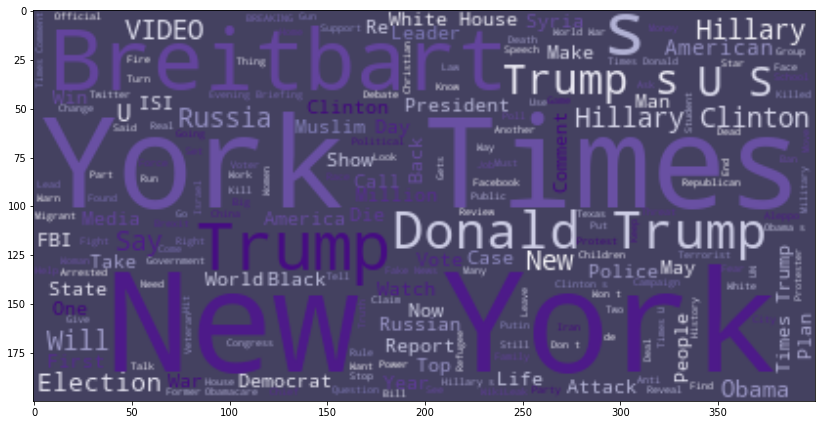

In [7]:
# Generate a word cloud image

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=1000).generate(" ".join(df["title"]))
plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [8]:
## get the Features

X=df.drop('label',axis=1)   # independent features
y=df['label']               # dependent features

In [9]:
## check if the data is biased or not

y.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [10]:
print(X.shape)
print(y.shape)

(20800, 4)
(20800,)


### Converting words into vectors

In [11]:
## we don't want to change or change our whole independent features, so we copy it to messages

messages=X.copy()
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [12]:
## if we have dropped the null values earlier so we use this to prevent any error 
 # messages.reset_index(inplace=True)

In [13]:
## importing text preprocessing libraries

import nltk
import re
from nltk.corpus import stopwords

In [14]:
## dowloading the stopwords package

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abhinandan
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
## dataset Preprocessing

from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [17]:
## one hot encoding representation

voc_size=5000   # vocabulary size

onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[3088, 2028, 1476, 4446, 4990, 4828, 2299, 3294, 4765, 2305],
 [372, 4894, 1360, 1637, 983, 2802, 2272],
 [1837, 4647, 3123, 3087],
 [2354, 1074, 2881, 809, 911, 4183],
 [900, 983, 2950, 1927, 4966, 2110, 983, 1230, 797, 1493],
 [2792,
  878,
  3195,
  2564,
  4395,
  1465,
  3409,
  2134,
  2617,
  3263,
  566,
  3817,
  377,
  3835,
  2272],
 [2143, 2143, 280, 4631, 2577, 2569, 3845, 2742, 2763, 1757, 3585, 968],
 [3429, 4833, 1408, 3335, 3086, 1203, 1348, 1152, 4031, 3067, 1387],
 [4674, 4241, 2041, 2089, 1465, 3232, 4744, 3421, 133, 400, 4031, 3067, 1387],
 [2639, 475, 2927, 4232, 1971, 1170, 1465, 1423, 4031, 3067, 1387],
 [4138, 2939, 3625, 2921, 3812, 4698, 1254, 1535, 1465, 2240],
 [4133, 897, 1363, 2662, 2028, 2279, 1040, 412],
 [3544, 3836, 1324, 2162, 4472, 738, 3954, 1504, 18, 502, 1679],
 [809, 3754, 4990, 4698, 1465, 1971],
 [4156, 279, 1020, 4319, 934, 3403, 3315, 1440, 3935],
 [800, 2490, 1991, 398, 2653, 338, 4887, 4031, 3067, 1387],
 [3064, 753, 1124, 2012, 4063, 403

In [18]:
print(corpus[1])
print(onehot_repr[1])

flynn hillari clinton big woman campu breitbart
[372, 4894, 1360, 1637, 983, 2802, 2272]


### Embedding Representation

In [19]:
## pad sequences

sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[3088 2028 1476 ...    0    0    0]
 [ 372 4894 1360 ...    0    0    0]
 [1837 4647 3123 ...    0    0    0]
 ...
 [3684 3111 2492 ...    0    0    0]
 [3713 1971  358 ...    0    0    0]
 [3145 1733 1771 ...    0    0    0]]


In [20]:
embedded_docs[1]


array([ 372, 4894, 1360, 1637,  983, 2802, 2272,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [60]:
## Creating model

embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_6 (Dropout)         (None, 20, 40)            0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [61]:
len(embedded_docs),y.shape

(20800, (20800,))

In [62]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_final.shape,y_final.shape

((20800, 20), (20800,))

In [63]:
## train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [64]:
## early stopping

es=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [65]:
## training the model

model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=128, callbacks=es)

Epoch 1/10
109/109 [==============================] - 10s 60ms/step - loss: 0.8651 - accuracy: 0.8056 - val_loss: 0.3010 - val_accuracy: 0.9098
Epoch 2/10
109/109 [==============================] - 13s 115ms/step - loss: 0.1893 - accuracy: 0.9394 - val_loss: 0.2008 - val_accuracy: 0.9258
Epoch 3/10
109/109 [==============================] - 13s 123ms/step - loss: 0.1334 - accuracy: 0.9555 - val_loss: 0.1967 - val_accuracy: 0.9238
Epoch 4/10
109/109 [==============================] - 13s 120ms/step - loss: 0.1022 - accuracy: 0.9655 - val_loss: 0.2161 - val_accuracy: 0.9276


### Performance Metrics And Accuracy

In [66]:
## predicting the model

y_pred=model.predict(X_test)

215/215 [==============================] - 2s 6ms/step


In [67]:
## using threshold and categorize as 1 or 0

y_pred=np.where(y_pred >= 0.5, 1,0)

In [68]:
## creating the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3136,  313],
       [ 184, 3231]], dtype=int64)

In [69]:
## calculating the accuracy score

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9275932400932401

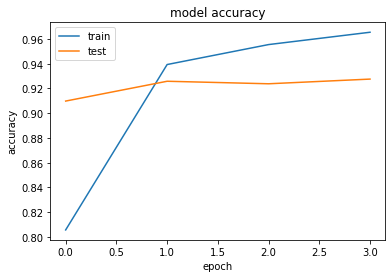

In [70]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

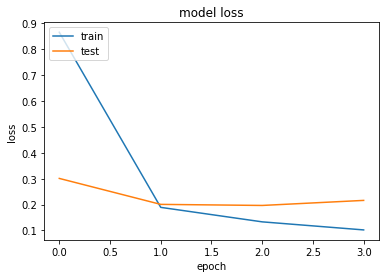

In [71]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
## classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3449
           1       0.91      0.95      0.93      3415

    accuracy                           0.93      6864
   macro avg       0.93      0.93      0.93      6864
weighted avg       0.93      0.93      0.93      6864

